# Perkenalan

- Nama : Praduta Firman Anugrah
* Batch : 002


- Dataset : Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan (ya) atau tidak (tidak) berlangganan.


- Sumber Dataset :  https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


- Objectives : Tujuan yang ingin dicapai adalah membuat model klasifikasi untuk memprediksi apakah klien akan berlangganan deposito berjangka (variabel y) tersebut.

# Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Data Loading

In [2]:
df = pd.read_csv('bank-additional-full.csv',delimiter = ";")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.shape

(41188, 21)

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Data Cleaning

In [9]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Tidak terdapat missing values

# Eksplorasi Data Analysis

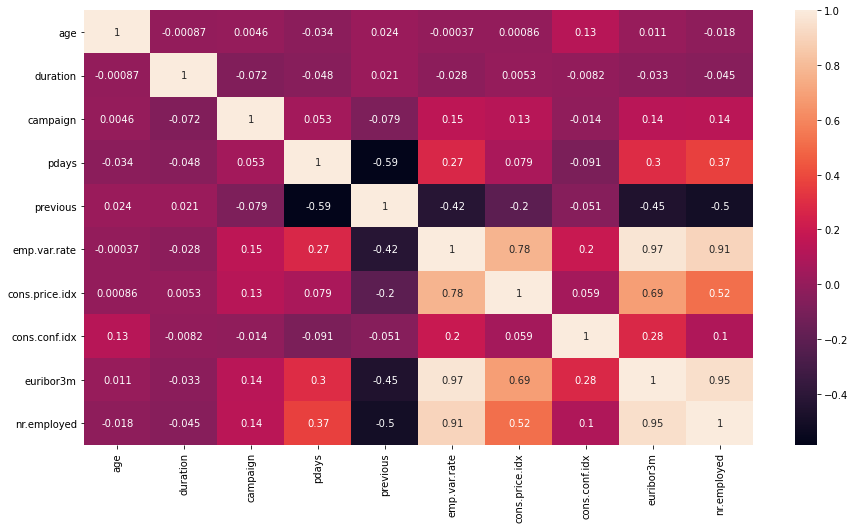

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True);

In [11]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

# Visualisasi Konsumen yang telah berlangganan deposito berjangka dan yang belum

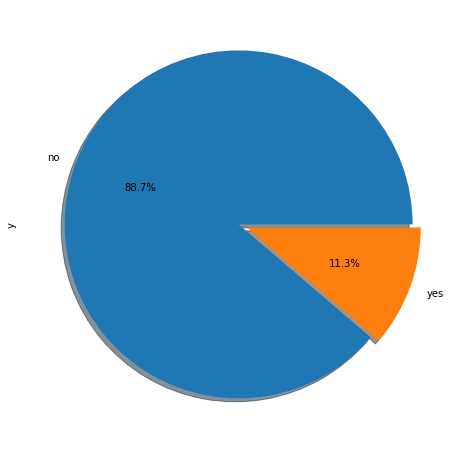

In [12]:
plt.figure(figsize=(8,8))
df['y'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', shadow=True);

jumlah client yang telah melakukan subscribe 4640 (11,3%) dan yang belum melakukan subscribe adalah 36548 (88,7%)

 Employment variation rate

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


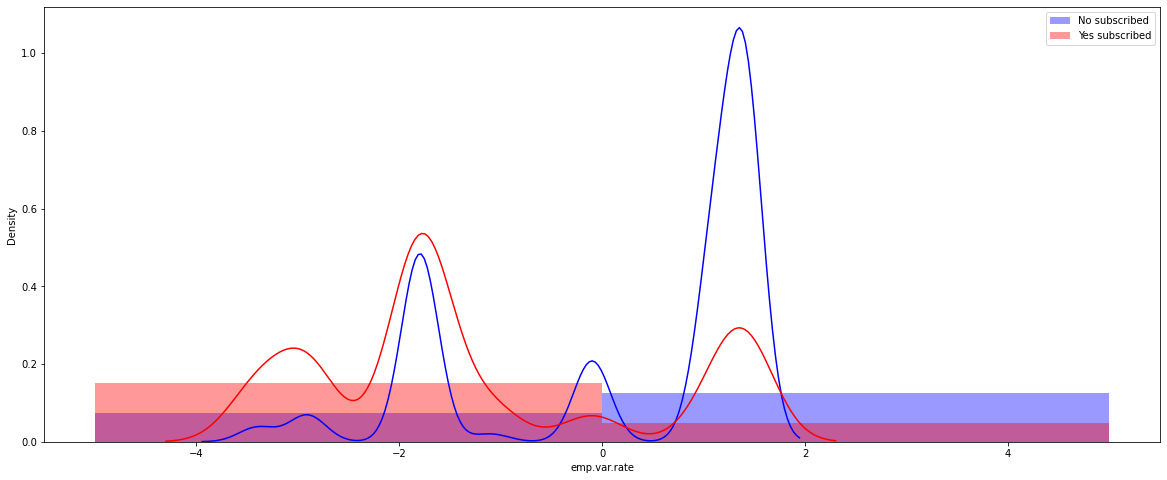

In [13]:
plt.figure(figsize=(20,8))
sns.distplot(df['emp.var.rate'][df.y == 'no'], bins=[-5.0,0.0,5.0], color='b', label='No subscribed')
sns.distplot(df['emp.var.rate'][df.y == 'yes'], bins=[-5.0,0.0,5.0], color='r', label='Yes subscribed')
plt.legend();

Berdasarkan visualisasi tersebut kondisi employment variation rate negatif konsumen cendrung subscribed, yaitu menyimpan dananya pada deposito berjangka.

Consumer Price Index (CPI)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


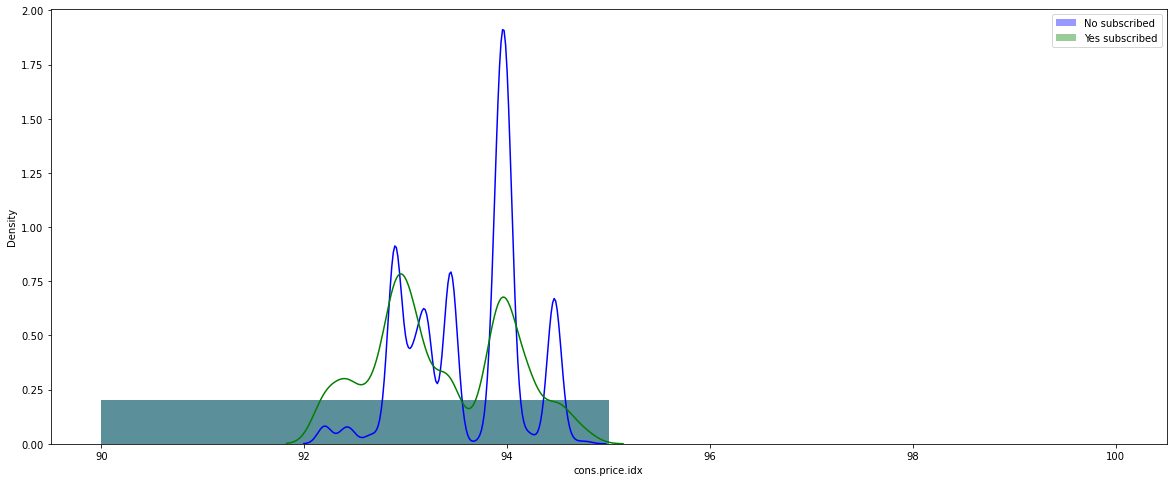

In [14]:
plt.figure(figsize=(20,8))
sns.distplot(df['cons.price.idx'][df.y == 'no'], bins=[90.0,95.0,100.0], color='b', label='No subscribed')
sns.distplot(df['cons.price.idx'][df.y == 'yes'], bins=[90.0,95.0,100.0], color='g', label='Yes subscribed')
plt.legend();

Consumer Confidence Index (CCI)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


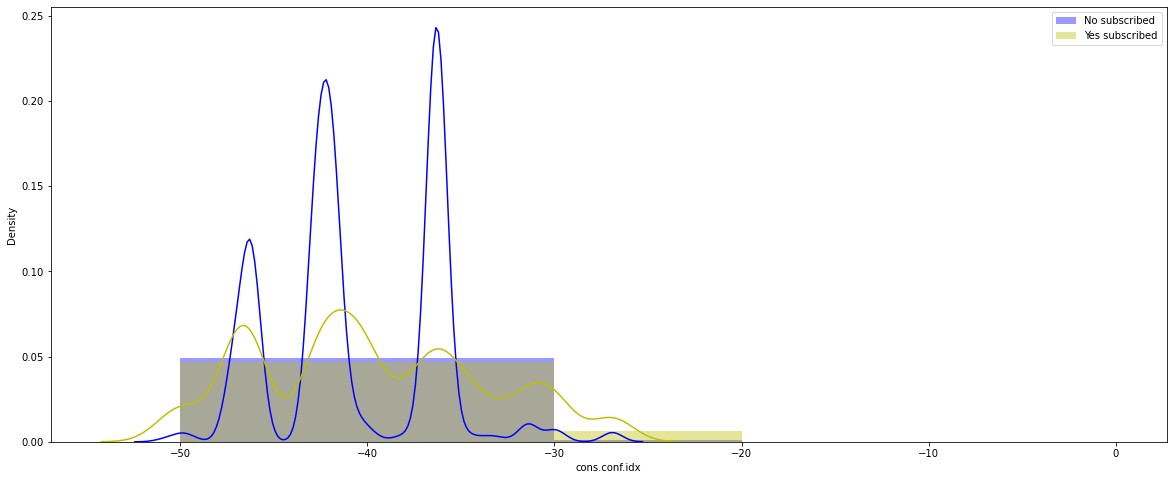

In [15]:
plt.figure(figsize=(20,8))
sns.distplot(df['cons.conf.idx'][df.y == 'no'], bins=[-50.0,-30.0,-20.0,-10.0,0.0], color='b', label='No subscribed')
sns.distplot(df['cons.conf.idx'][df.y == 'yes'], bins=[-50.0,-30.0,-20.0,-10.0,0.0], color='y', label='Yes subscribed')
plt.legend();

Euribor Rate

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


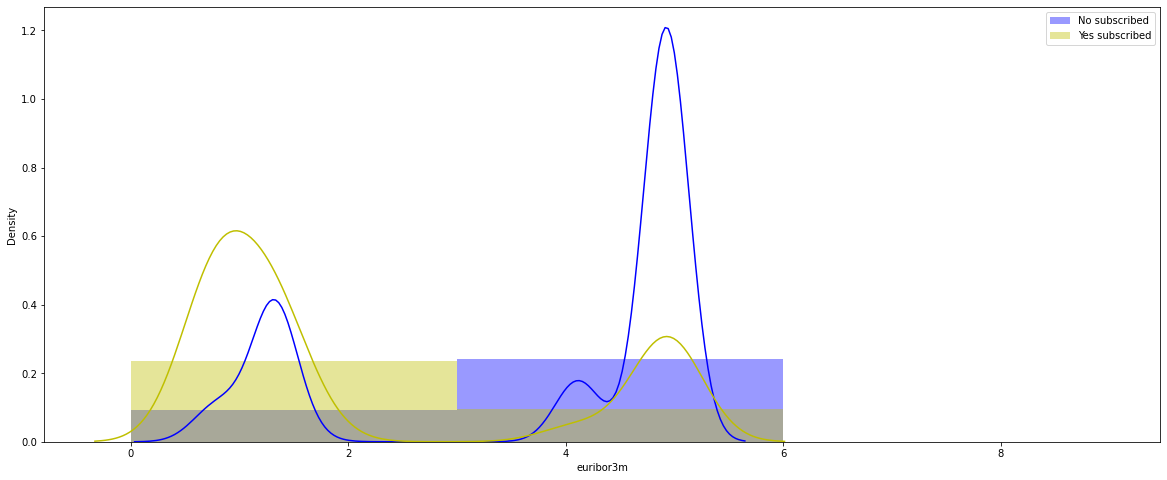

In [16]:
plt.figure(figsize=(20,8))
sns.distplot(df['euribor3m'][df.y == 'no'], bins=[0.0,3.0,6.0,9.0], color='b', label='No subscribed')
sns.distplot(df['euribor3m'][df.y == 'yes'], bins=[0.0,3.0,6.0,9.0], color='y', label='Yes subscribed')
plt.legend();

Employee Rate

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


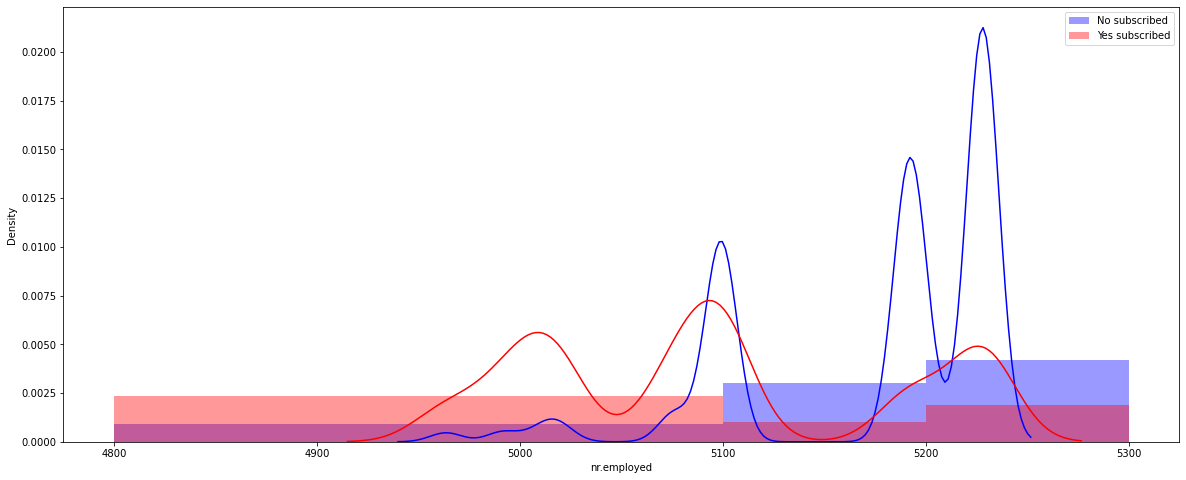

In [17]:
plt.figure(figsize=(20,8))
sns.distplot(df['nr.employed'][df.y == 'no'], bins=[4800.0, 5100.0, 5200.0, 5300.0], color='b', label='No subscribed')
sns.distplot(df['nr.employed'][df.y == 'yes'], bins=[4800.0, 5100.0, 5200.0, 5300.0], color='r', label='Yes subscribed')
plt.legend();

Bank Client Data Analysis


Age

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


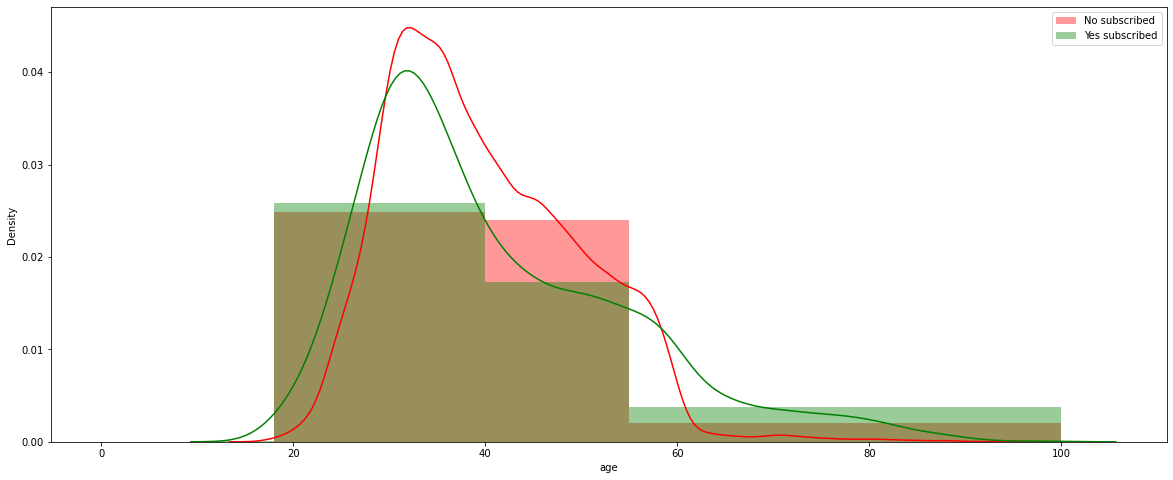

In [18]:
plt.figure(figsize=(20,8))
sns.distplot(df.age[df.y == 'no'], bins=[0,5,12,18,40,55,100], color='r', label='No subscribed')
sns.distplot(df.age[df.y == 'yes'], bins=[0,5,12,18,40,55,100], color='g', label='Yes subscribed')
plt.legend();

Categorical Bank Data

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\li

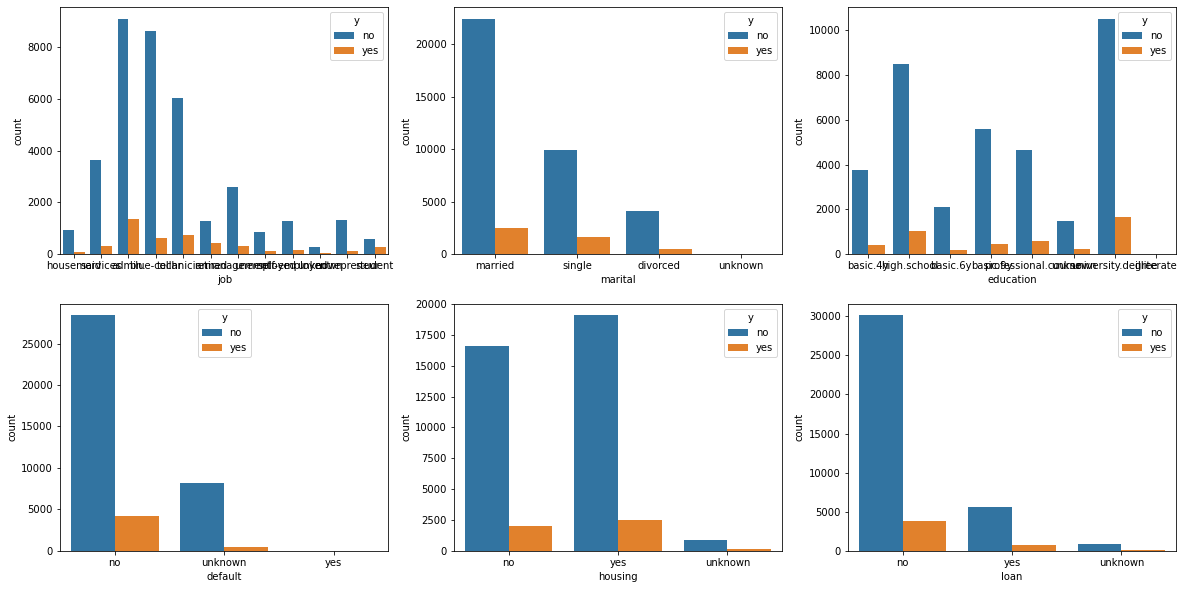

In [19]:
cat_var = ['job', 'marital', 'education', 'default', 'housing', 'loan']

fig, axes = plt.subplots(2,3, figsize=(20,10))

for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(cat, data=df, hue='y', ax=ax)

Bank Campaign

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


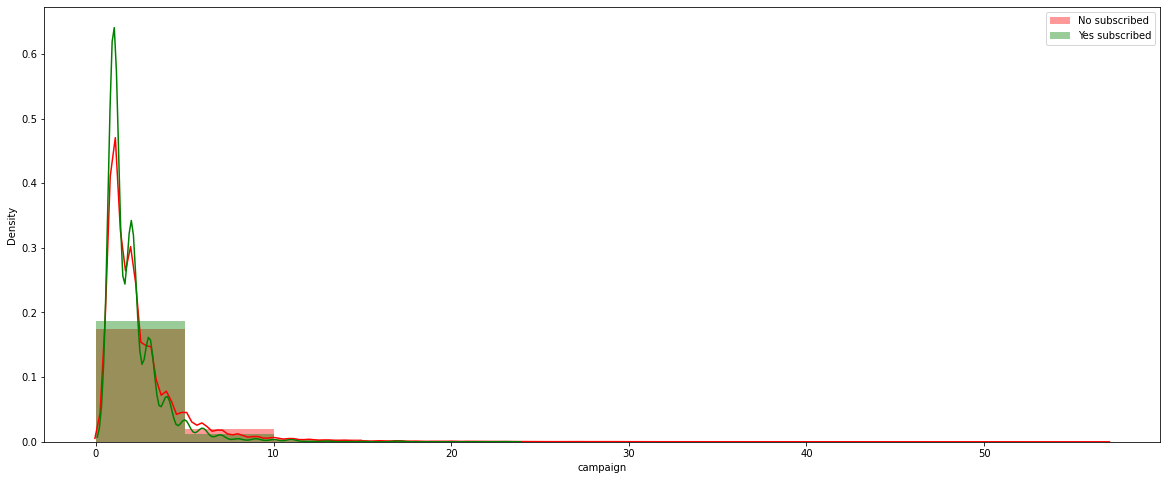

In [20]:
plt.figure(figsize=(20,8))
sns.distplot(df.campaign[df.y == 'no'], bins=[0,5,10,15,20,25], color='r', label='No subscribed')
sns.distplot(df.campaign[df.y == 'yes'], bins=[0,5,10,15,20,25], color='g', label='Yes subscribed')
plt.legend();

Categorical campaign

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\li

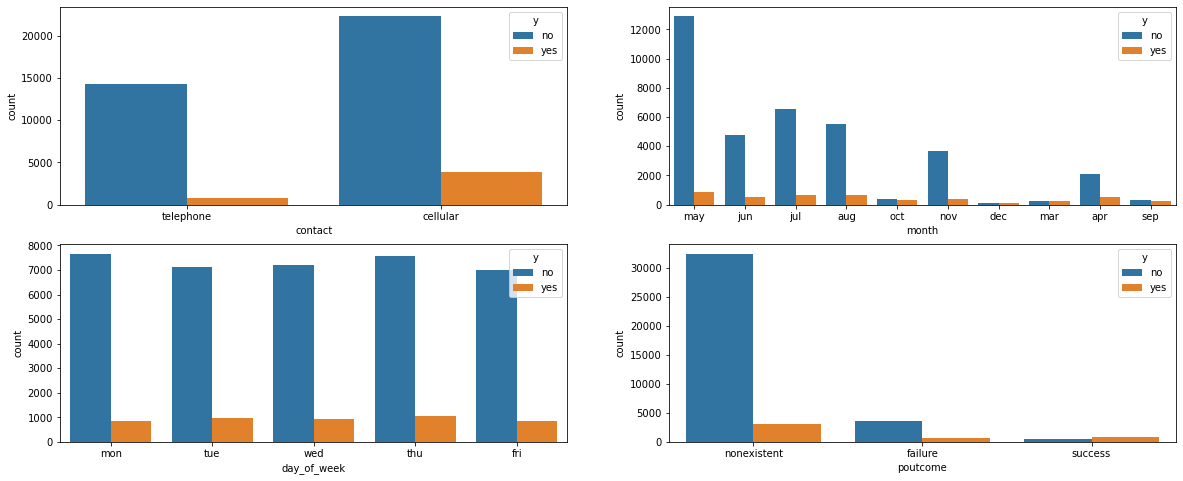

In [21]:
cat_var = ['contact','month', 'day_of_week', 'poutcome']

fig, axes = plt.subplots(2,2, figsize=(20,8))

for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(cat, data=df, hue='y', ax=ax)

Pdays

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


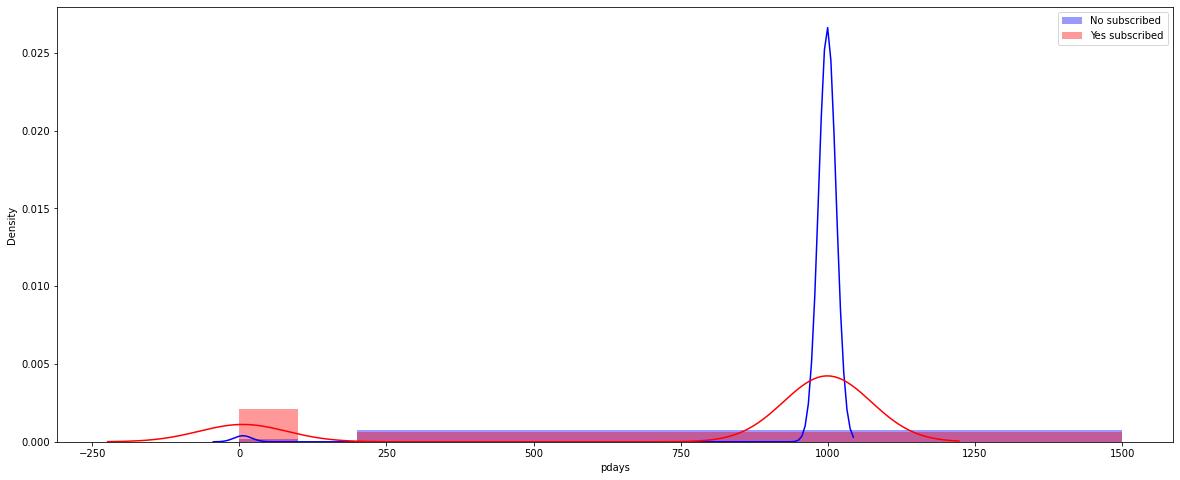

In [22]:
plt.figure(figsize=(20,8))
sns.distplot(df.pdays[df.y == 'no'], bins=[-100, 0,100, 200, 1500], color='b', label='No subscribed')
sns.distplot(df.pdays[df.y == 'yes'], bins=[-100, 0,100, 200, 1500], color='r', label='Yes subscribed')
plt.legend();

Previous

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


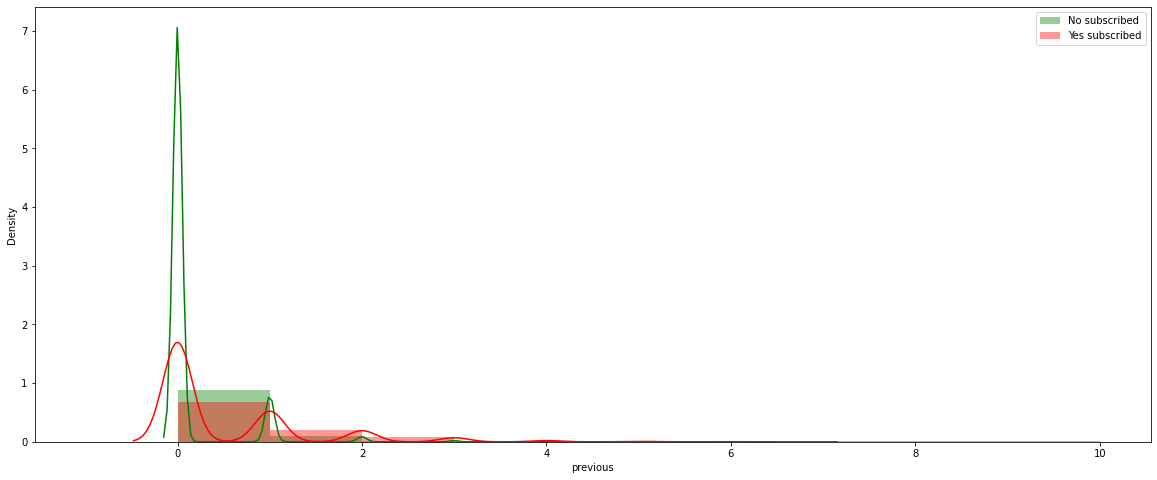

In [23]:
plt.figure(figsize=(20,8))
sns.distplot(df.previous[df.y == 'no'], bins=[-1,0,1,2,3,10], color='g', label='No subscribed')
sns.distplot(df.previous[df.y == 'yes'], bins=[-1,0,1,2,3,10], color='r', label='Yes subscribed')
plt.legend();

# Data Preprocessing

In [24]:
job_mapping = { k: i for i, k in enumerate(df['job'].unique(), 0)}
marital_mapping = { k: i for i, k in enumerate(df['marital'].unique(), 0)}
education_mapping = { k: i for i, k in enumerate(df['education'].unique(), 0)}
default_mapping = { k: i for i, k in enumerate(df['default'].unique(), 0)}
housing_mapping = { k: i for i, k in enumerate(df['housing'].unique(), 0)}
loan_mapping = { k: i for i, k in enumerate(df['loan'].unique(), 0)}
contact_mapping = { k: i for i, k in enumerate(df['contact'].unique(), 0)}
month_mapping = { k: i for i, k in enumerate(df['month'].unique(), 0)}
day_of_week_mapping = { k: i for i, k in enumerate(df['day_of_week'].unique(), 0)}
poutcome_mapping = { k: i for i, k in enumerate(df['poutcome'].unique(), 0)}
y_mapping = { k: i for i, k in enumerate(df['y'].unique(), 0)}

print('\n')
print('Job: \n',job_mapping)
print('\n')
print('marital: \n',marital_mapping)
print('\n')
print('education: \n',education_mapping)
print('\n')
print('default: \n',default_mapping)
print('\n')
print('housing: \n',housing_mapping)
print('\n')
print('loan: \n',loan_mapping)
print('\n')
print('contact: \n',contact_mapping)
print('\n')
print('month: \n',month_mapping)
print('\n')
print('day_of_week: \n',day_of_week_mapping)
print('\n')
print('poutcome: \n',poutcome_mapping)
print('\n')
print('y: \n',y_mapping)



Job: 
 {'housemaid': 0, 'services': 1, 'admin.': 2, 'blue-collar': 3, 'technician': 4, 'retired': 5, 'management': 6, 'unemployed': 7, 'self-employed': 8, 'unknown': 9, 'entrepreneur': 10, 'student': 11}


marital: 
 {'married': 0, 'single': 1, 'divorced': 2, 'unknown': 3}


education: 
 {'basic.4y': 0, 'high.school': 1, 'basic.6y': 2, 'basic.9y': 3, 'professional.course': 4, 'unknown': 5, 'university.degree': 6, 'illiterate': 7}


default: 
 {'no': 0, 'unknown': 1, 'yes': 2}


housing: 
 {'no': 0, 'yes': 1, 'unknown': 2}


loan: 
 {'no': 0, 'yes': 1, 'unknown': 2}


contact: 
 {'telephone': 0, 'cellular': 1}


month: 
 {'may': 0, 'jun': 1, 'jul': 2, 'aug': 3, 'oct': 4, 'nov': 5, 'dec': 6, 'mar': 7, 'apr': 8, 'sep': 9}


day_of_week: 
 {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4}


poutcome: 
 {'nonexistent': 0, 'failure': 1, 'success': 2}


y: 
 {'no': 0, 'yes': 1}


Mengubah labels dengan numerical dengan cara Integer Encoding

In [25]:
df['job'] = df['job'].map(job_mapping)
df['marital'] = df['marital'].map(marital_mapping)
df['education'] = df['education'].map(education_mapping)
df['default'] = df['default'].map(default_mapping)
df['housing'] = df['housing'].map(housing_mapping)
df['loan'] = df['loan'].map(loan_mapping)
df['contact'] = df['contact'].map(contact_mapping)
df['month'] = df['month'].map(month_mapping)
df['day_of_week'] = df['day_of_week'].map(day_of_week_mapping)
df['poutcome'] = df['poutcome'].map(poutcome_mapping)
df['y'] = df['y'].map(y_mapping)

Mengecek data yang telah dilakukan perubahan data categorical menjadi numerical

In [26]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1,1,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1,0,1,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,0,2,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1,0,0,1,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [27]:
col_to_use = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

df = df[col_to_use]

Menentukan variable X dan y

In [28]:
X = df.drop('y', axis=1)
y = df['y']

# Pendefinisian Model

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
X_train.shape[0] , X_test.shape[0]

(28831, 12357)

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trf = scaler.transform(X_train)
X_test_trf = scaler.transform(X_test)

# Pelatihan Model

In [32]:
logistic_reg = LogisticRegression(solver="lbfgs", random_state=42)

%time logistic_reg.fit(X_train_trf, y_train)

Wall time: 122 ms


LogisticRegression(random_state=42)

In [33]:
svc_linear = SVC(kernel='linear', random_state=42, C=1)

%time svc_linear.fit(X_train_trf, y_train)

Wall time: 5min 21s


SVC(C=1, kernel='linear', random_state=42)

In [34]:
svc_rbf_1 = SVC(kernel='rbf', random_state=42, C=1)

%time svc_rbf_1.fit(X_train_trf, y_train)

Wall time: 1min


SVC(C=1, random_state=42)

In [35]:
svc_rbf_2 = SVC(kernel='rbf', random_state=42, C=0.1)

%time svc_rbf_2.fit(X_train_trf, y_train)

Wall time: 24.8 s


SVC(C=0.1, random_state=42)

In [36]:
svc_poly = SVC(kernel='poly', degree=4 , random_state=42, C=1)

%time svc_poly.fit(X_train_trf, y_train)

Wall time: 49.2 s


SVC(C=1, degree=4, kernel='poly', random_state=42)

In [37]:
tree_model = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42)

%time tree_model.fit(X_train_trf, y_train)

Wall time: 122 ms


DecisionTreeClassifier(max_leaf_nodes=16, random_state=42)

In [38]:
rfc_model = RandomForestClassifier(n_estimators=500, random_state=42)

%time rfc_model.fit(X_train_trf, y_train)

Wall time: 20.7 s


RandomForestClassifier(n_estimators=500, random_state=42)

In [39]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', leaf_size=30, p=2)

%time knn_model.fit(X_train_trf, y_train)

Wall time: 651 ms


KNeighborsClassifier()

In [40]:
gnb_model = GaussianNB()

%time gnb_model.fit(X_train_trf, y_train)

Wall time: 16.5 ms


GaussianNB()

In [41]:
bag_model = BaggingClassifier(DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16), n_estimators=500, random_state=42)

%time bag_model.fit(X_train_trf, y_train)


Wall time: 9.81 s


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_features='sqrt',
                                                        max_leaf_nodes=16),
                  n_estimators=500, random_state=42)

In [42]:
adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=42)

%time adaboost_model.fit(X_train_trf, y_train)

Wall time: 6.12 s


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [43]:
gradientboost_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.7, random_state=42)

%time gradientboost_model.fit(X_train_trf, y_train)

Wall time: 8.63 s


GradientBoostingClassifier(learning_rate=0.7, n_estimators=200, random_state=42)

# Evaluasi Model

LOGISTIC REGRESSION

In [44]:
%time y_preds_log = logistic_reg.predict(X_test_trf)

Wall time: 21 ms


In [45]:
print(confusion_matrix(y_test, y_preds_log))

[[10800   168]
 [ 1080   309]]


In [46]:
print(classification_report(y_test, y_preds_log))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10968
           1       0.65      0.22      0.33      1389

    accuracy                           0.90     12357
   macro avg       0.78      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357



In [47]:
y_pred_proba_log = logistic_reg.predict_proba(X_test_trf)

In [48]:
logistic_reg_recall = recall_score(y_test, y_preds_log)
logistic_reg_accuracy = accuracy_score(y_test, y_preds_log)
logistic_reg_precision = precision_score(y_test, y_preds_log)
logistic_reg_roc_auc_score = roc_auc_score(y_test, y_pred_proba_log[:,1])

SVC LINEAR

In [49]:
%time y_preds_lin = svc_linear.predict(X_test_trf)

Wall time: 2.16 s


In [50]:
print(confusion_matrix(y_test, y_preds_lin))

[[10787   181]
 [ 1094   295]]


In [51]:
print(classification_report(y_test, y_preds_lin))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10968
           1       0.62      0.21      0.32      1389

    accuracy                           0.90     12357
   macro avg       0.76      0.60      0.63     12357
weighted avg       0.88      0.90      0.87     12357



In [52]:
y_pred_proba_svc_linear = svc_linear.decision_function(X_test_trf)

In [53]:
svc_linear_recall = recall_score(y_test, y_preds_lin)
svc_linear_accuracy = accuracy_score(y_test, y_preds_lin)
svc_linear_precision = precision_score(y_test, y_preds_lin)
svc_linear_roc_auc_score = roc_auc_score(y_test, y_pred_proba_svc_linear)

SVC RBF 1

In [54]:
%time y_preds_rbf1 = svc_rbf_1.predict(X_test_trf)

Wall time: 3.58 s


In [55]:
confusion_matrix(y_test, y_preds_rbf1)

array([[10779,   189],
       [ 1051,   338]], dtype=int64)

In [56]:
print(classification_report(y_test, y_preds_rbf1))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10968
           1       0.64      0.24      0.35      1389

    accuracy                           0.90     12357
   macro avg       0.78      0.61      0.65     12357
weighted avg       0.88      0.90      0.88     12357



In [57]:
y_pred_proba_rbf1 = svc_rbf_1.decision_function(X_test_trf)

In [58]:
svc_rbf_1_recall = recall_score(y_test, y_preds_rbf1)
svc_rbf_1_accuracy = accuracy_score(y_test, y_preds_rbf1)
svc_rbf_1_precision = precision_score(y_test, y_preds_rbf1)
svc_rbf_1_roc_auc_score = roc_auc_score(y_test, y_pred_proba_rbf1)

SVC RBF 2

In [59]:
%time y_preds_rbf2 = svc_rbf_2.predict(X_test_trf)

Wall time: 3.1 s


In [60]:
confusion_matrix(y_test, y_preds_rbf2)

array([[10843,   125],
       [ 1124,   265]], dtype=int64)

In [61]:
print(classification_report(y_test, y_preds_rbf2))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10968
           1       0.68      0.19      0.30      1389

    accuracy                           0.90     12357
   macro avg       0.79      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



In [62]:
y_pred_proba_rbf_2 = svc_rbf_2.decision_function(X_test_trf)

In [63]:
svc_rbf_2_recall = recall_score(y_test, y_preds_rbf2)
svc_rbf_2_accuracy = accuracy_score(y_test, y_preds_rbf2)
svc_rbf_2_precision = precision_score(y_test, y_preds_rbf2)
svc_rbf_2_roc_auc_score = roc_auc_score(y_test, y_pred_proba_rbf_2)

SVC Poly

In [64]:
%time y_preds_poly = svc_poly.predict(X_test_trf)

Wall time: 2.08 s


In [65]:
confusion_matrix(y_test, y_preds_poly)

array([[10749,   219],
       [ 1080,   309]], dtype=int64)

In [66]:
print(classification_report(y_test, y_preds_poly))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10968
           1       0.59      0.22      0.32      1389

    accuracy                           0.89     12357
   macro avg       0.75      0.60      0.63     12357
weighted avg       0.87      0.89      0.87     12357



In [67]:
y_pred_proba_poly = svc_poly.decision_function(X_test_trf)

In [68]:
svc_poly_recall = recall_score(y_test, y_preds_poly)
svc_poly_accuracy = accuracy_score(y_test, y_preds_poly)
svc_poly_precision = precision_score(y_test, y_preds_poly)
svc_poly_roc_auc_score = roc_auc_score(y_test, y_pred_proba_poly)

DECISION TREE

In [69]:
%time y_preds_tree = tree_model.predict(X_test_trf)

Wall time: 0 ns


In [70]:
confusion_matrix(y_test, y_preds_tree)

array([[10767,   201],
       [ 1039,   350]], dtype=int64)

In [71]:
print(classification_report(y_test, y_preds_tree))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10968
           1       0.64      0.25      0.36      1389

    accuracy                           0.90     12357
   macro avg       0.77      0.62      0.65     12357
weighted avg       0.88      0.90      0.88     12357



In [72]:
y_pred_proba_tree = tree_model.predict_proba(X_test_trf)

In [73]:
tree_model_recall = recall_score(y_test, y_preds_tree)
tree_model_accuracy = accuracy_score(y_test, y_preds_tree)
tree_model_precision = precision_score(y_test, y_preds_tree)
tree_model_roc_auc_score = roc_auc_score(y_test, y_pred_proba_tree[:,1])

RANDOM FOREST CLASSIFIER

In [74]:
%time y_preds_rfc = rfc_model.predict(X_test_trf)

Wall time: 1.68 s


In [75]:
print(confusion_matrix(y_test, y_preds_rfc))

[[10627   341]
 [  993   396]]


In [76]:
print(classification_report(y_test, y_preds_rfc))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10968
           1       0.54      0.29      0.37      1389

    accuracy                           0.89     12357
   macro avg       0.73      0.63      0.66     12357
weighted avg       0.87      0.89      0.88     12357



In [77]:
y_pred_proba_rfc = rfc_model.predict_proba(X_test_trf)

In [78]:
rfc_recall = recall_score(y_test, y_preds_rfc)
rfc_accuracy = accuracy_score(y_test, y_preds_rfc)
rfc_precision = precision_score(y_test, y_preds_rfc)
rfc_roc_auc_score = roc_auc_score(y_test, y_pred_proba_rfc[:,1])

K-NEIGHBOURS CLASSIFIER

In [79]:
%time y_preds_knn = knn_model.predict(X_test_trf)

Wall time: 8.47 s


In [80]:
print(confusion_matrix(y_test, y_preds_knn))

[[10624   344]
 [ 1006   383]]


In [81]:
print(classification_report(y_test, y_preds_rfc))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10968
           1       0.54      0.29      0.37      1389

    accuracy                           0.89     12357
   macro avg       0.73      0.63      0.66     12357
weighted avg       0.87      0.89      0.88     12357



In [82]:
y_pred_proba_knn = knn_model.predict_proba(X_test_trf)

In [83]:
knn_recall = recall_score(y_test, y_preds_knn)
knn_accuracy = accuracy_score(y_test, y_preds_knn)
knn_precision = precision_score(y_test, y_preds_knn)
knn_roc_auc_score = roc_auc_score(y_test, y_pred_proba_knn[:,1])

 GAUSIAN NAIVE BAYES

In [84]:
%time y_preds_gnb = gnb_model.predict(X_test_trf)

Wall time: 0 ns


In [85]:
print(confusion_matrix(y_test, y_preds_gnb))

[[9412 1556]
 [ 623  766]]


In [86]:
print(classification_report(y_test, y_preds_gnb))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     10968
           1       0.33      0.55      0.41      1389

    accuracy                           0.82     12357
   macro avg       0.63      0.70      0.65     12357
weighted avg       0.87      0.82      0.84     12357



In [87]:
y_pred_proba_gnb = gnb_model.predict_proba(X_test_trf)

In [88]:
gnb_recall = recall_score(y_test, y_preds_gnb)
gnb_accuracy = accuracy_score(y_test, y_preds_gnb)
gnb_precision = precision_score(y_test, y_preds_gnb)
gnb_roc_auc_score = roc_auc_score(y_test, y_pred_proba_gnb[:,1])

ADA BOOST

In [89]:
%time y_preds_adaboost = adaboost_model.predict(X_test_trf)

Wall time: 631 ms


In [90]:
print(confusion_matrix(y_test, y_preds_adaboost))

[[10826   142]
 [ 1088   301]]


In [91]:
print(classification_report(y_test, y_preds_adaboost))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10968
           1       0.68      0.22      0.33      1389

    accuracy                           0.90     12357
   macro avg       0.79      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357



In [92]:
y_pred_proba_adaboost = adaboost_model.predict_proba(X_test_trf)

In [93]:
adaboost_recall = recall_score(y_test, y_preds_adaboost)
adaboost_accuracy = accuracy_score(y_test, y_preds_adaboost)
adaboost_precision = precision_score(y_test, y_preds_adaboost)
adaboost_roc_auc_score = roc_auc_score(y_test, y_pred_proba_adaboost[:,1])

GRADIEN BOOST

In [94]:
%time y_preds_gradientboost = gradientboost_model.predict(X_test_trf)

Wall time: 69 ms


In [95]:
print(confusion_matrix(y_test, y_preds_gradientboost))

[[10662   306]
 [  985   404]]


In [96]:
print(classification_report(y_test, y_preds_gradientboost))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10968
           1       0.57      0.29      0.38      1389

    accuracy                           0.90     12357
   macro avg       0.74      0.63      0.66     12357
weighted avg       0.88      0.90      0.88     12357



In [97]:
y_pred_proba_gradientboost = gradientboost_model.predict_proba(X_test_trf)

In [98]:
gradientboost_recall = recall_score(y_test, y_preds_gradientboost)
gradientboost_accuracy = accuracy_score(y_test, y_preds_gradientboost)
gradientboost_precision = precision_score(y_test, y_preds_gradientboost)
gradientboost_roc_auc_score = roc_auc_score(y_test, y_pred_proba_gradientboost[:,1])

In [99]:
model = pd.Series(['Logistic Regression', 'SVC Linear', 'SVC RBF 1', 'SVC RBF 2' , 'SVC poly', 'DecesionTree', 'RandomForestClassifier', 'KNeighborsClassifier ', 'Naive Bayes', 'AdaBoost', 'GradientBoostingClassifier'])

In [100]:
accuracy = pd.Series([logistic_reg_accuracy, svc_linear_accuracy, svc_rbf_1_accuracy, svc_rbf_2_accuracy,  svc_poly_accuracy, tree_model_accuracy, rfc_accuracy,knn_accuracy, gnb_accuracy, adaboost_accuracy, gradientboost_accuracy])
recall = pd.Series([logistic_reg_recall, svc_linear_recall, svc_rbf_1_recall, svc_rbf_2_recall,  svc_poly_recall, tree_model_recall, rfc_recall, knn_recall, gnb_recall, adaboost_recall,  gradientboost_recall])
precision = pd.Series([logistic_reg_precision, svc_linear_precision, svc_rbf_1_precision, svc_rbf_2_precision,  svc_poly_precision, tree_model_precision, rfc_precision, knn_precision, gnb_precision, adaboost_precision, gradientboost_precision])
roc_auc_score = pd.Series([logistic_reg_roc_auc_score, svc_linear_roc_auc_score,svc_rbf_1_roc_auc_score ,svc_rbf_2_roc_auc_score,  svc_poly_roc_auc_score, tree_model_roc_auc_score, rfc_roc_auc_score, knn_roc_auc_score, gnb_roc_auc_score, adaboost_roc_auc_score, gradientboost_roc_auc_score])

In [101]:
choose_classification = pd.DataFrame({'model': model, 'accuracy': accuracy, 'recall': recall, 'precision': precision, 'roc_auc_score': roc_auc_score})
choose_classification

,model,accuracy,recall,precision,roc_auc_score
0,Logistic Regression,0.899005,0.222462,0.647799,0.778070
1,SVC Linear,0.896820,0.212383,0.619748,0.640477
2,SVC RBF 1,0.899652,0.243341,0.641366,0.673752
3,SVC RBF 2,0.898924,0.190785,0.679487,0.685639
4,SVC poly,0.894877,0.222462,0.585227,0.676097
5,DecesionTree,0.899652,0.251980,0.635209,0.771203
6,RandomForestClassifier,0.892045,0.285097,0.537313,0.777638
7,KNeighborsClassifier,0.890750,0.275738,0.526823,0.723753
8,Naive Bayes,0.823663,0.551476,0.329888,0.761944
9,AdaBoost,0.900461,0.216703,0.679458,0.793869


In [102]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)

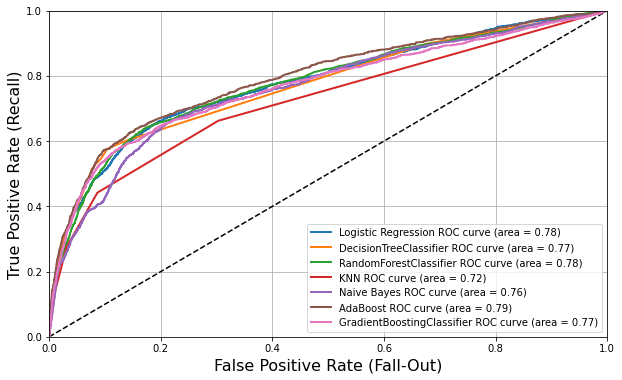

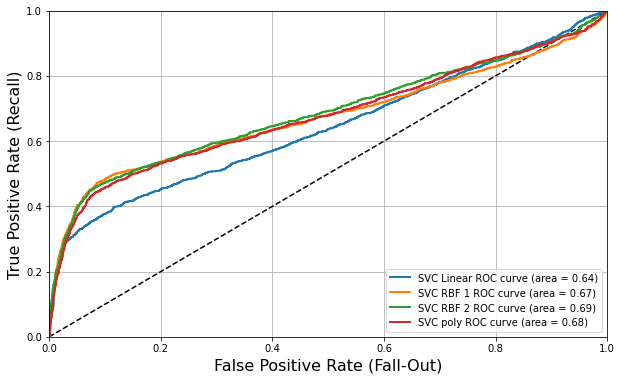

In [103]:
plt.figure(figsize=(10, 6))                                    
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

labels=['Logistic Regression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNN', 'Naive Bayes', 'AdaBoost', 'GradientBoostingClassifier']
for idx,model in enumerate([logistic_reg, tree_model, rfc_model, knn_model, gnb_model, adaboost_model, gradientboost_model]):
    y_scores = model.predict_proba(X_test_trf)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right");


plt.figure(figsize=(10, 6))                                    
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

labels=['SVC Linear', 'SVC RBF 1', 'SVC RBF 2', 'SVC poly' ]
for idx,model in enumerate([svc_linear, svc_rbf_1, svc_rbf_2, svc_poly ]):
    y_scores = model.decision_function(X_test_trf)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right");

# Model Analysis

Berdasarkan dari pemodelan training yang telah dilakukan dengan mempertimbangkan performance dan mempertimbangkan waktu training yang lebih cepat maka diperoleh model Logistic Regression yang memiliki performa yang lebih baik dari model yang lainnya dengan mendapatkan score accuracy senilai 0.899, score recall senilai 0.222, score precision senilai 0.647, dan score roc_auc senilai 0.778.

# Cross Validation

Scoring Logistic Regression dengan Cross Validation

In [104]:
np.random.seed(42)

cv_acc_log = cross_val_score(logistic_reg, X, y, cv=10, scoring='accuracy')
cv_precision_log = cross_val_score(logistic_reg, X, y, cv=10, scoring='precision')
cv_recall_log = cross_val_score(logistic_reg, X, y, cv=10, scoring='recall')

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(

In [105]:
cross_val_acc_log = np.mean(cv_acc_log)
cross_val_pres_log = np.mean(cv_precision_log)
cross_val_recall_log = np.mean(cv_recall_log)

Scoring Decision Tree dengan Cross Validation

In [106]:
np.random.seed(42)

cv_acc_tree = cross_val_score(tree_model, X, y, cv=10, scoring='accuracy')
cv_precision_tree = cross_val_score(tree_model, X, y, cv=10, scoring='precision')
cv_recall_tree = cross_val_score(tree_model, X, y, cv=10, scoring='recall')

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
cross_val_acc_tree = np.mean(cv_acc_tree)
cross_val_pres_tree = np.mean(cv_precision_tree)
cross_val_recall_tree = np.mean(cv_recall_tree)

Random Forest Classification dengan Cross Validation

In [108]:
np.random.seed(42)

cv_acc_rfc = cross_val_score(rfc_model, X, y, cv=10, scoring='accuracy')
cv_precision_rfc = cross_val_score(rfc_model, X, y, cv=10, scoring='precision')
cv_recall_rfc = cross_val_score(rfc_model, X, y, cv=10, scoring='recall')

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
cross_val_acc_rfc = np.mean(cv_acc_rfc)
cross_val_pres_rfc = np.mean(cv_precision_rfc)
cross_val_recall_rfc = np.mean(cv_recall_rfc)

KNeighbors Classifier dengan Cross Validation

In [110]:
np.random.seed(42)

cv_acc_knn = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')
cv_precision_knn = cross_val_score(knn_model, X, y, cv=10, scoring='precision')
cv_recall_knn = cross_val_score(knn_model, X, y, cv=10, scoring='recall')

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
cross_val_acc_knn = np.mean(cv_acc_knn)
cross_val_pres_knn = np.mean(cv_precision_knn)
cross_val_recall_knn = np.mean(cv_recall_knn)

Naive Bayes dengan Cross Validation¶

In [112]:
np.random.seed(42)

cv_acc_gnb = cross_val_score(gnb_model, X, y, cv=10, scoring='accuracy')
cv_precision_gnb = cross_val_score(gnb_model, X, y, cv=10, scoring='precision')
cv_recall_gnb = cross_val_score(gnb_model, X, y, cv=10, scoring='recall')

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
cross_val_acc_gnb = np.mean(cv_acc_gnb)
cross_val_pres_gnb = np.mean(cv_precision_gnb)
cross_val_recall_gnb = np.mean(cv_recall_gnb)

# Evaluasi Cross Validation

In [114]:
model = pd.Series(['Logistic Regression', 'DecisionTree', 'RandomForestClassifier', 'KNeighborsClassifier ', 'Naive Bayes'])

In [115]:
accuracy = pd.Series([cross_val_acc_log, cross_val_acc_tree, cross_val_acc_rfc, cross_val_acc_knn, cross_val_acc_gnb])
recall = pd.Series([cross_val_recall_log, cross_val_recall_tree, cross_val_recall_rfc, cross_val_recall_knn, cross_val_recall_gnb ])
precision = pd.Series([cross_val_pres_log, cross_val_pres_tree, cross_val_pres_rfc, cross_val_pres_knn, cross_val_pres_gnb])

In [116]:
cross_val = pd.DataFrame({'model': model, 'accuracy': accuracy, 'recall': recall, 'precision': precision})
cross_val

,model,accuracy,recall,precision
0,Logistic Regression,NaN,NaN,NaN
1,DecisionTree,0.579924,0.112069,0.059043
2,RandomForestClassifier,0.395517,0.105172,0.013807
3,KNeighborsClassifier,0.701869,0.164440,0.051940
4,Naive Bayes,0.763750,0.491595,0.513054


# Analysis Cross Validation

# Model Inference

Mmebuat Data Baru

In [117]:
values = [[20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 800, 0, 2, 94.767, -36.4, 4.857, 5191.0, 5167.03 ]]

In [118]:
data_dummies = pd.DataFrame(values,columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',  'month',  'day_of_week', 'campaign',  'pdays',  'previous',  'poutcome',  'emp.var.rate',  'cons.price.idx',  'cons.conf.idx',  'euribor3m',  'nr.employed'])

In [119]:
data_dummies

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,20,0,0,0,0,0,0,0,0,0,1,800,0,2,94.767,-36.4,4.857,5191.0,5167.03


In [120]:
logistic_reg = LogisticRegression(solver="lbfgs", random_state=42)

%time logistic_reg.fit(X_train_trf, y_train)


predictions = logistic_reg.predict(data_dummies)


# Menentukan hasil Prediksi
print("\n")
print("Hasil Prediksi dengan data baru: \n")
if predictions == 0 :
    print("Dari hasil prediksi dengan menggunakan data baru didapatkan nilai 0 ('No') atau ada kemungkinan klien tersebut tidak berlangganan deposito berjangka")
else:
    print("Dari hasil prediksi dengan menggunakan data baru didapatkan nilai 1 ('Yes') atau ada kemungkinan klien tersebut akan berlangganan deposito berjangka")

Wall time: 161 ms


Hasil Prediksi dengan data baru: 

Dari hasil prediksi dengan menggunakan data baru didapatkan nilai 0 ('No') atau ada kemungkinan klien tersebut tidak berlangganan deposito berjangka


# Overall Analysis

In [121]:
choose_classification

,model,accuracy,recall,precision,roc_auc_score
0,Logistic Regression,0.899005,0.222462,0.647799,0.778070
1,SVC Linear,0.896820,0.212383,0.619748,0.640477
2,SVC RBF 1,0.899652,0.243341,0.641366,0.673752
3,SVC RBF 2,0.898924,0.190785,0.679487,0.685639
4,SVC poly,0.894877,0.222462,0.585227,0.676097
5,DecesionTree,0.899652,0.251980,0.635209,0.771203
6,RandomForestClassifier,0.892045,0.285097,0.537313,0.777638
7,KNeighborsClassifier,0.890750,0.275738,0.526823,0.723753
8,Naive Bayes,0.823663,0.551476,0.329888,0.761944
9,AdaBoost,0.900461,0.216703,0.679458,0.793869


Berdasarkan dari pemodelan training yang telah dilakukan dengan mempertimbangkan performance dan mempertimbangkan waktu training yang lebih cepat maka diperoleh model Logistic Regression yang memiliki performa yang lebih baik dari model yang lainnya dengan mendapatkan score accuracy senilai 0.899, score recall senilai 0.222, score precision senilai 0.647, dan score roc_auc senilai 0.778.

# Grid Search

Logistic Regression

In [122]:
# Logistic Regression
logistic_reg = LogisticRegression(solver="lbfgs", random_state=42)

# hyperparameter space
logistic_reg_param_grid = dict(
    solver=['lbfgs','newton-cg','saga'],
    C=[1, 10],
)

# search
logistic_reg_grid = GridSearchCV(logistic_reg, logistic_reg_param_grid,
                   scoring='accuracy', cv=5)

%time search_grid_log = logistic_reg_grid.fit(X, y)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(

C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The 

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(

C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  

Wall time: 1min 2s


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [123]:
search_grid_log.best_params_

{'C': 1, 'solver': 'saga'}

In [124]:
results = pd.DataFrame(search_grid_log.cv_results_)[['params', 'mean_test_score']]

results.head()

,params,mean_test_score
0,"{'C': 1, 'solver': 'lbfgs'}",NaN
1,"{'C': 1, 'solver': 'newton-cg'}",0.757153
2,"{'C': 1, 'solver': 'saga'}",0.890842
3,"{'C': 10, 'solver': 'lbfgs'}",NaN
4,"{'C': 10, 'solver': 'newton-cg'}",0.758343


Best parameternya : {'C': 1, 'solver': 'saga'} dengan accuracy : 0.89

DecisionTree

In [125]:
# Decision Tree Classifier
tree_model = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42)

# hyperparameter space
tree_param_grid = dict(
    criterion=['gini', 'entropy'],
    max_leaf_nodes=[16, 20],
)

# search
tree_grid = GridSearchCV(tree_model, tree_param_grid,
                   scoring='accuracy', cv=5)

%time search_grid_tree = tree_grid.fit(X, y)

Wall time: 1.76 s


In [126]:
search_grid_tree.best_params_

{'criterion': 'gini', 'max_leaf_nodes': 16}

In [127]:
results = pd.DataFrame(search_grid_tree.cv_results_)[['params', 'mean_test_score']]

results.head()

,params,mean_test_score
0,"{'criterion': 'gini', 'max_leaf_nodes': 16}",0.427489
1,"{'criterion': 'gini', 'max_leaf_nodes': 20}",0.427489
2,"{'criterion': 'entropy', 'max_leaf_nodes': 16}",0.427295
3,"{'criterion': 'entropy', 'max_leaf_nodes': 20}",0.425401


Best parameternya : {'criterion': 'gini', 'max_leaf_nodes': 20}	 dengan accuracy : 0.43

RandomForestClassifier

In [128]:
# Random Forest Classifier
rfc_model = RandomForestClassifier(n_estimators=500, random_state=42)

# hyperparameter space
rfc_param_grid = dict(
    n_estimators=[100, 500],
    max_depth=[1, 2],
)

# search
rfc_grid = GridSearchCV(rfc_model, rfc_param_grid,
                   scoring='accuracy', cv=5)

%time search_grid_rfc = rfc_grid.fit(X, y)

Wall time: 55.7 s


In [129]:
search_grid_rfc.best_params_

{'max_depth': 1, 'n_estimators': 500}

In [130]:
results = pd.DataFrame(search_grid_rfc.cv_results_)[['params', 'mean_test_score']]

results.head()

,params,mean_test_score
0,"{'max_depth': 1, 'n_estimators': 100}",0.849128
1,"{'max_depth': 1, 'n_estimators': 500}",0.849152
2,"{'max_depth': 2, 'n_estimators': 100}",0.685306
3,"{'max_depth': 2, 'n_estimators': 500}",0.685233


Best parameternya : {'max_depth': 1, 'n_estimators': 500} dengan accuracy : 0.85

KNeighborsClassifier

In [131]:
# KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', leaf_size=30, p=2)

# hyperparameter space
knn_param_grid = dict(
    n_neighbors=[5, 10],
    weights=['uniform','distance'],
)

# search
knn_grid = GridSearchCV(knn_model, knn_param_grid,
                   scoring='accuracy', cv=5)

%time search_grid_knn = knn_grid.fit(X, y)

Wall time: 1min 14s


In [132]:
search_grid_knn.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [133]:
results = pd.DataFrame(search_grid_knn.cv_results_)[['params', 'mean_test_score']]

results.head()

,params,mean_test_score
0,"{'n_neighbors': 5, 'weights': 'uniform'}",0.596567
1,"{'n_neighbors': 5, 'weights': 'distance'}",0.591031
2,"{'n_neighbors': 10, 'weights': 'uniform'}",0.640390
3,"{'n_neighbors': 10, 'weights': 'distance'}",0.614508


Best parameternya : {'n_neighbors': 10, 'weights': 'uniform'} dengan accuracy : 0.64

Naive Bayes

In [134]:
# Gaussian Naive Bayes
gnb_model = GaussianNB()

# hyperparameter space
gnb_param_grid = dict(
    var_smoothing=[1e-11, 1e-10, 1e-9],
)

# search
gnb_grid = GridSearchCV(gnb_model, gnb_param_grid,
                   scoring='accuracy', cv=5)

%time search_grid_gnb = gnb_grid.fit(X, y)

Wall time: 661 ms


In [135]:
search_grid_gnb.best_params_

{'var_smoothing': 1e-11}

In [136]:
results = pd.DataFrame(search_grid_gnb.cv_results_)[['params', 'mean_test_score']]

results.head()

,params,mean_test_score
0,{'var_smoothing': 1e-11},0.688195
1,{'var_smoothing': 1e-10},0.688195
2,{'var_smoothing': 1e-09},0.688195


Best parameternya : {'var_smoothing': 1e-09} dengan accuracy : 0.69

AdaBoost

In [137]:
# Adaboost
adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=42)

# hyperparameter space
adaboost_param_grid = dict(
    n_estimators=[100, 200],
    learning_rate=[0.5, 1]
)

# search
adaboost_grid = GridSearchCV(adaboost_model, adaboost_param_grid,
                   scoring='accuracy')

%time search_grid_adaboost = adaboost_grid.fit(X, y)

Wall time: 1min 41s


In [138]:
search_grid_adaboost.best_params_

{'learning_rate': 0.5, 'n_estimators': 100}

In [139]:
results = pd.DataFrame(search_grid_adaboost.cv_results_)[['params', 'mean_test_score']]

results.head()

,params,mean_test_score
0,"{'learning_rate': 0.5, 'n_estimators': 100}",0.476775
1,"{'learning_rate': 0.5, 'n_estimators': 200}",0.475706
2,"{'learning_rate': 1, 'n_estimators': 100}",0.467815
3,"{'learning_rate': 1, 'n_estimators': 200}",0.463080


Best parameternya : {'learning_rate': 0.5, 'n_estimators': 100}	 dengan accuracy : 0.48

Bagging Classifier

In [140]:
# Bagging Claasifier
bag_model = BaggingClassifier(DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16), n_estimators=500, random_state=42)

# hyperparameter space
bag_param_grid = dict(
    n_estimators=[100, 500],
    max_features=[1,2]
)

# search
bag_grid = GridSearchCV(bag_model, bag_param_grid,
                   scoring='accuracy')

%time search_grid_bag = bag_grid.fit(X, y)

Wall time: 49.2 s


In [141]:
search_grid_bag.best_params_

{'max_features': 1, 'n_estimators': 100}

In [142]:
results = pd.DataFrame(search_grid_bag.cv_results_)[['params', 'mean_test_score']]

results.head()

,params,mean_test_score
0,"{'max_features': 1, 'n_estimators': 100}",0.886884
1,"{'max_features': 1, 'n_estimators': 500}",0.886593
2,"{'max_features': 2, 'n_estimators': 100}",0.828927
3,"{'max_features': 2, 'n_estimators': 500}",0.847550


Best parameternya : {'max_features': 1, 'n_estimators': 100} dengan accuracy : 0.89

GradientBoostingClassifier

In [143]:
# Gradient Boost
gradientboost_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.7, random_state=42)

# hyperparameter space
gradientboost_param_grid = dict(
    n_estimators=[100, 200],
    learning_rate=[0.7, 1]
)

# search
gradientboost_grid = GridSearchCV(gradientboost_model, gradientboost_param_grid,
                   scoring='accuracy')

%time search_grid_gradientboost = gradientboost_grid.fit(X, y)

Wall time: 2min 6s


In [144]:
search_grid_gradientboost.best_params_

{'learning_rate': 0.7, 'n_estimators': 100}

In [145]:
results = pd.DataFrame(search_grid_gradientboost.cv_results_)[['params', 'mean_test_score']]

results.head()

,params,mean_test_score
0,"{'learning_rate': 0.7, 'n_estimators': 100}",0.430087
1,"{'learning_rate': 0.7, 'n_estimators': 200}",0.406732
2,"{'learning_rate': 1, 'n_estimators': 100}",0.419745
3,"{'learning_rate': 1, 'n_estimators': 200}",0.405517


Best parameternya : {'learning_rate': 0.7, 'n_estimators': 100} dengan accuracy : 0.43

# Saving Model

In [146]:
pickle.dump(logistic_reg, open('model_classifier.pkl','wb'))